# PJM 10 YEAR DATA ANALYSIS

**DATA INCLUDES 10+ YEARS OF HOURLY ENERGY CONSUMPTIONIN MEGAWATTSA (from PJM's website)

**PJM Interconnection LLC (PJM) is a regional transmission organization (RTO) in the United States

It is part of the Eastern Interconnection grid operating an electric transmission system serving all or parts of Delaware, Illinois, Indiana, Kentucky, Maryland, Michigan, New Jersey, North Carolina, Ohio, Pennsylvania, Tennessee, Virginia, West Virginia, and the District of Columbia.

**The regions have changed over the years so data may only appear for certain dates per region.

**goals of working on this dataset:
Split the last year into a test set- How to build a model to predict energy consumption?
Find trends in energy consumption 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import datetime 
%matplotlib inline

In [2]:
df = pd.read_csv("pjm-data/AEP_hourly.csv")
df.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB


In [4]:
df.describe()

,AEP_MW
count,121273.000000
mean,15499.513717
std,2591.399065
min,9581.000000
25%,13630.000000
50%,15310.000000
75%,17200.000000
max,25695.000000


In [5]:
#seperate date and time 
df["New_Date"] = pd.to_datetime(df["Datetime"]).dt.date
df["New_Time"] = pd.to_datetime(df["Datetime"]).dt.time

In [6]:
df1 = df
df1.head(2)

,Datetime,AEP_MW,New_Date,New_Time
0,2004-12-31 01:00:00,13478.0,2004-12-31,01:00:00
1,2004-12-31 02:00:00,12865.0,2004-12-31,02:00:00


In [7]:
#find the max consumption 
df1[df1["AEP_MW"] == df["AEP_MW"].max()]

,Datetime,AEP_MW,New_Date,New_Time
30221,2008-10-20 14:00:00,25695.0,2008-10-20,14:00:00


In [8]:
#find the min consumption
df1[df1["AEP_MW"] == df["AEP_MW"].min()]

,Datetime,AEP_MW,New_Date,New_Time
100759,2016-10-02 05:00:00,9581.0,2016-10-02,05:00:00


/home/aj/energyENV/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AEP_MW', ylabel='Density'>

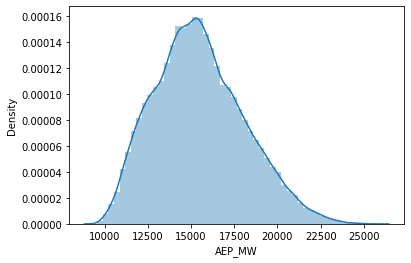

In [9]:
#plot and visualization
sns.distplot(df1["AEP_MW"])

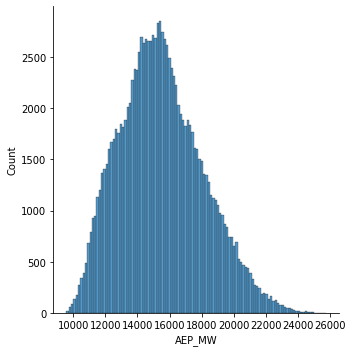

In [10]:
sns.displot(df1["AEP_MW"])

In [11]:
#extract date and time
df1["Year"] = pd.DatetimeIndex(df['New_Date']).year
df1.head(2)

,Datetime,AEP_MW,New_Date,New_Time,Year
0,2004-12-31 01:00:00,13478.0,2004-12-31,01:00:00,2004
1,2004-12-31 02:00:00,12865.0,2004-12-31,02:00:00,2004


In [12]:
df1["Year"].unique()

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018])

In [13]:
df1[df1["Year"] == 2013].nunique()

Datetime    8758
AEP_MW      5601
New_Date     365
New_Time      24
Year           1
dtype: int64

<AxesSubplot:xlabel='Year', ylabel='AEP_MW'>

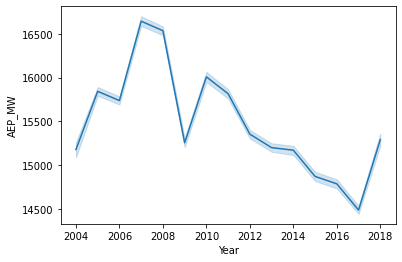

In [14]:
#relationship of consumption and year
sns.lineplot(x=df1["Year"], y=df1["AEP_MW"], data=df1)

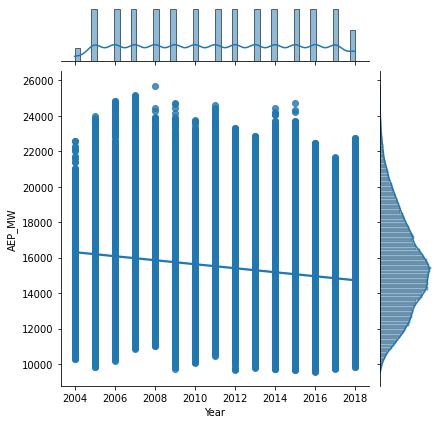

In [15]:
#Regression
sns.jointplot(x=df1["Year"],
              y=df1["AEP_MW"],
              data=df1,
            kind="reg")

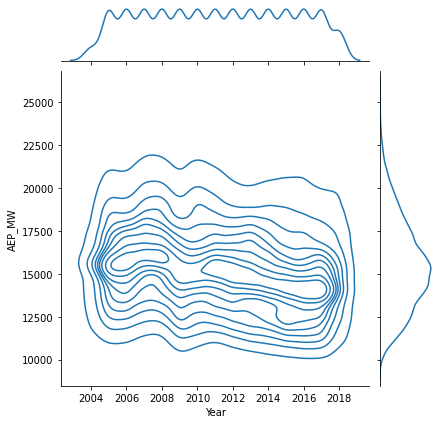

In [16]:
sns.jointplot(x=df1["Year"],
              y=df1["AEP_MW"],
              data=df1,
            kind="kde")

TypeError: Invalid object type at position 0

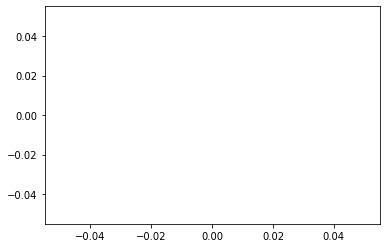

In [18]:
#relation between consumption and time
sns.lineplot(x=df1["New_Time"], y=df1["AEP_MW"], data=df1)
#df1.head(2)